In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

import librosa
import librosa.display
import soundfile as sf

In [2]:
DATA_PATH = '../data/'

ORIGIN_FILE_PATH = os.path.join(DATA_PATH, '1.wav')

In [3]:
origin_data, sr = librosa.load(ORIGIN_FILE_PATH)

Wav length: 2.40175, Mel_S shape:(40, 241)


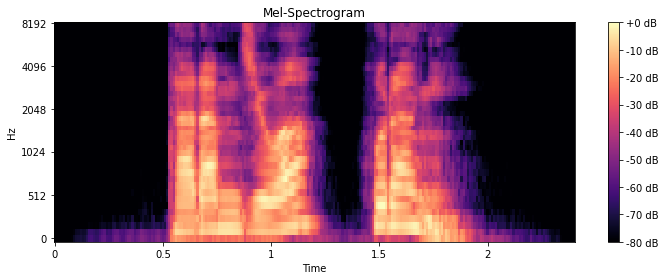

In [4]:
frame_length = 0.025
frame_stride = 0.010

def Mel_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
#     plt.savefig('Mel-Spectrogram example.png')
    plt.show()

    return S

mel_spec = Mel_S(ORIGIN_FILE_PATH)

In [5]:
save_data = librosa.griffinlim(mel_spec)  # 복원

SAVE_FILE_NAME = 'saved.wav'
SAVE_FILE_PATH = os.path.join(DATA_PATH, SAVE_FILE_NAME)
sf.write(os.path.join(SAVE_FILE_PATH), save_data, sr)

In [6]:
ipd.Audio(ORIGIN_FILE_PATH)

In [7]:
ipd.Audio(SAVE_FILE_PATH)

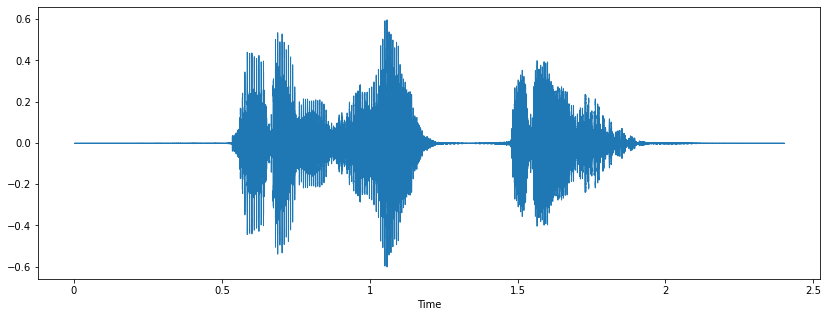

In [8]:
fig = plt.figure(figsize = (14,5))

librosa.display.waveshow(origin_data, sr=sr)